In [133]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import warnings
import re 
import string
import wordninja 
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
# maxTweets = 20000
# # Creating list to append tweet data to
# tweets_list2 = []
# # Using TwitterSearchScraper to scrape data and append tweets to list
# for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Safaricom_Care since:2016-01-01 until:2022-12-15').get_items()):
#     if i>maxTweets:
#         break
#     tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
# # Creating a dataframe from the tweets list above
# tweets_df = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
# tweets_df.to_csv("tweets.csv", index = False)

In [71]:
tweets_df = pd.read_csv('tweets (3).csv')
tweets_df .head()

,Datetime,Tweet Id,Text,Username
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn


In [72]:
tweets_df ['Text'] = tweets_df['Text'].str.lower() 


In [73]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username
0,2022-12-14 23:47:00+00:00,1603174748451733504,ditto @safaricom_care https://t.co/sgk6l3yqhd,OnguruMeister
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john hello john, the deadline was octobe...",Safaricom_Care
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @abdulahiadan10 @safaricom_care @be...,I_im_kibagendi
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@safaricom_care, @safaricomplc we demand you ...",MutonyeMutuku_
4,2022-12-14 23:19:59+00:00,1603167951682764800,"hey @safaricom_care @safaricomplc ,15th decemb...",ndungujosephn


In [74]:
tweets_df = tweets_df[tweets_df['Username'] != 'Safaricom_Care']

In [75]:
tweets_df.shape

(14786, 4)

In [76]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username
0,2022-12-14 23:47:00+00:00,1603174748451733504,ditto @safaricom_care https://t.co/sgk6l3yqhd,OnguruMeister
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @abdulahiadan10 @safaricom_care @be...,I_im_kibagendi
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@safaricom_care, @safaricomplc we demand you ...",MutonyeMutuku_
4,2022-12-14 23:19:59+00:00,1603167951682764800,"hey @safaricom_care @safaricomplc ,15th decemb...",ndungujosephn
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @safaricomplc @safaricom_care th...,cellestialtech


In [155]:
# Defining functions to clean data
def remove_links(tweet):
    """Takes in a string and removes weblinks from it"""
    tweet = re.sub(r"https\S+"," ",tweet)
    tweet = re.sub(r"bit.ly/\S+", " ",tweet)
    return tweet
def remove_user(tweet):
    """Takes in a string and removes @user information from it"""
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet)
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet)
    # tweet = re.sub("(sxsw)"," ",tweet)
    # tweet = re.sub("(link)"," ",tweet)
    return tweet
def remove_hashtags(tweet):
    """Takes in a string and removes @user information from it"""
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet)
    return tweet
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""
    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = deEmojify(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet


In [156]:
ls1=[]
for i in tweets_df["Text"]:
    ls1.append(basic_clean(i))

tweets_df['Clean_Tweets']=ls1
    

In [157]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,ditto @safaricom_care https://t.co/sgk6l3yqhd,OnguruMeister,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @abdulahiadan10 @safaricom_care @be...,I_im_kibagendi,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@safaricom_care, @safaricomplc we demand you ...",MutonyeMutuku_,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,"hey @safaricom_care @safaricomplc ,15th decemb...",ndungujosephn,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @safaricomplc @safaricom_care th...,cellestialtech,the man is dead you buggers still holding ...


In [158]:
df = tweets_df[['Datetime', 'Clean_Tweets']]
df.head()

,Datetime,Clean_Tweets
0,2022-12-14 23:47:00+00:00,ditto
2,2022-12-14 23:35:29+00:00,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,the man is dead you buggers still holding ...


In [159]:
# # Splitting concatenated words into separate words 
# df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: wordninja.split(str(TextBlob(x))))  
# df["Clean_Tweets"] = df.Clean_Tweets.str.join(' ')
# df["Clean_Tweets"].head()

In [160]:
#Removing stopwords
stop_words = stopwords.words('english')
new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
stop_words.extend(new_stopwords)
df["Clean_Tweets"] = df["Clean_Tweets"].apply(lambda x: ' '.join(word for word in x.split () if word not in (stop_words)))
df.head()

,Datetime,Clean_Tweets
0,2022-12-14 23:47:00+00:00,ditto
2,2022-12-14 23:35:29+00:00,see started clearly show boychild misses funda...
3,2022-12-14 23:34:57+00:00,demand statement concerning maxine wahome youv...
4,2022-12-14 23:19:59+00:00,th december birthday see something data bundle...
5,2022-12-14 23:00:12+00:00,man dead buggers holding sponsorship maxinewah...


In [161]:
ls2=[]
for i in df["Clean_Tweets"]:
    ls2.append(basic_clean(i))

df['Clean_Tweets']=ls2

df

,Datetime,Clean_Tweets
0,2022-12-14 23:47:00+00:00,ditto
2,2022-12-14 23:35:29+00:00,see started clearly show boychild misses funda...
3,2022-12-14 23:34:57+00:00,demand statement concerning maxine wahome youv...
4,2022-12-14 23:19:59+00:00,th december birthday see something data bundle...
5,2022-12-14 23:00:12+00:00,man dead buggers holding sponsorship maxinewah...
...,...,...
19992,2022-11-11 07:09:11+00:00,said done several times also specifically repo...
19995,2022-11-11 07:03:06+00:00,mtu therfvcker sana unasnitch ndo upate nini d...
19996,2022-11-11 06:57:40+00:00,paid amount paybill charged bob explain previo...
19997,2022-11-11 06:57:37+00:00,plans counter g


In [182]:
freq = pd.Series(' '.join(df.Clean_Tweets).split()).value_counts()[350:400]
freq

available       51
shida           51
package         51
🤣               51
weeks           51
matter          51
ile             50
case            50
comes           50
sorry           50
postpay         50
mb              50
feedback        49
twitter         49
speeds          49
mbps            49
unsubscribe     49
global          48
redeem          48
wako            48
serious         48
around          48
reversed        47
keeps           47
allow           47
subscription    47
ndo             47
date            47
hawa            47
country         47
clients         47
kcb             46
despite         46
responded       46
world           46
youtube         46
currently       46
hakuna          46
requested       46
game            46
post            46
confirm         46
team            46
cost            45
worst           45
part            45
reason          45
net             45
kazi            45
resolved        45
dtype: int64

In [185]:
mpesa = {"pesa", "m-pesa", "esa", "send money", "mpesa", "money", "till", "fuliza", "app", "reverse", "transaction", "reversal"
        "agent", "paybill", "buygoods", "statement", "loan", "bank", "cash", "recipient", "mshwari", "withdraw", "lipa"}
voice = {"credit", "card",'credo', "okoa","credit", "airtime", "call", "minutes", "calls", "phone", "jahazi"}
internet = {"fibre", "fiber", "faiba",'safaricom home', "data", "internet", "bundles", "bundle", "network", "gb", "wifi", 
            "connection", "youtube", "net", "mbps"}
valueaddedservices = {"bonga", "daima" , "lipamdogomdogo", "hustler", "points"}
def label_tweet(tweet):
    if mpesa.intersection(tweet.split(" ")):
        return "mpesa"
    elif voice.intersection(tweet.split(" ")):
        return "voice"
    elif internet.intersection(tweet.split(" ")):
        return "internet"
    elif valueaddedservices.intersection(tweet.split(" ")):
        return "valueaddedservices"
    else:
        return "general"
# Add a new column to the dataframe with the labels for each tweet
df["Category"] = df['Clean_Tweets'].apply(label_tweet)
df["Category"].value_counts()


general               9218
mpesa                 2659
internet              1605
voice                 1080
valueaddedservices     224
Name: Category, dtype: int64

In [86]:
df.head(5)

,Datetime,Clean_Tweets,Category
0,2022-12-14 23:47:00+00:00,ditto,general
2,2022-12-14 23:35:29+00:00,see started clearly show boychild misses funda...,general
3,2022-12-14 23:34:57+00:00,demand issue statement concerning maxine wahom...,general
4,2022-12-14 23:19:59+00:00,hey th december birthday see today something d...,internet
5,2022-12-14 23:00:12+00:00,man dead buggers still holding sponsorship max...,general


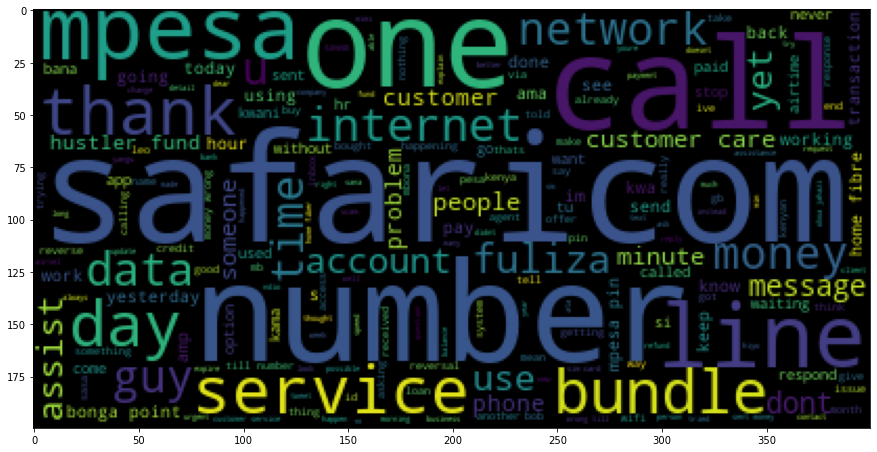

In [137]:
sentences = df['Clean_Tweets'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(15,15))
# plt.imshow(WordCloud(background_color='white',mask=twitter_mask).generate(sentences_ss))
plt.imshow(WordCloud().generate(sentences_ss))